In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Given functions
def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.random.rand(N)
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

### Problem 7

In [3]:
#Define the polynomial size
p = 2

#Get a value for a 
a = get_a(p)

#Generate training and test data
x_train, y_train = draw_sample(p,a,10)
x_test, y_test = draw_sample(p,a,1000)

In [4]:
#Define our least squares estimator function
def least_squares_estimator(X, y):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1
    
    Returns:
    b_hat: (np.array) of size N x (deg_true + 1)
    """
    #Make sure N > d
    if X.shape[0] < X.shape[1]:
        raise ValueError("You must have at least as many rows as columns!")
    else:
        #Compute the solution for b using the closed form linear algebra solution
        b_hat = np.linalg.inv(X.T@X) @ X.T @ y
        return b_hat

### Problem 8

In [5]:
def empirical_risk(X,y,b_hat):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1
    b_hat: (np.array) of size N x (deg_true + 1)
    Returns:
    emp_risk: (float) 
    """
    #Get # of observations
    N = X.shape[0]
    #Calculate Predictions
    y_hat = X @ b_hat
    #Calculate squared errors and then empirical risk
    sum_of_squared_errors = sum((y_hat-y)**2)
    emp_risk = sum_of_squared_errors / N
    emp_risk = emp_risk / 2 #because we have 1/2 in our loss function
    return emp_risk

### Problem 9

In [6]:
#Generate design matrices
X_train = get_design_mat(x_train, p)
X_test = get_design_mat(x_test, p)

In [7]:
#Calculate b_hat
b_hat = least_squares_estimator(X_train,y_train)

In [8]:
#Compare a and b_hat values
for i in range(len(b_hat)):
    print('Values at Index', i, 'For Vectors b_Hat and a',a[i],b_hat[i])
    print("Difference rounded to 5 decimal places:", np.round(a[i]-b_hat[i],5))

Values at Index 0 For Vectors b_Hat and a -3.1540868424055537 -3.1540868424055515
Difference rounded to 5 decimal places: -0.0
Values at Index 1 For Vectors b_Hat and a 7.49008785214131 7.490087852141285
Difference rounded to 5 decimal places: 0.0
Values at Index 2 For Vectors b_Hat and a -2.3268527381400355 -2.326852738140003
Difference rounded to 5 decimal places: -0.0


In [9]:
#Use a helper function to make the graphing easier
def helper_func(x, degree):
    return np.array([x**i for i in range(degree+1)])

The function is well estimated, and therefore not visible on the graph as it is covered up by the original function g(x)


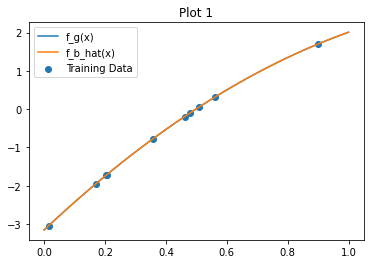

In [10]:
#Plot b_hat predictions vs A
x = np.linspace(0,1,100)
func_g = a@ helper_func(x,p)
b_hat_x = b_hat @ helper_func(x,p)
plt.scatter(x_train,y_train)

#B_hat predictions given
plt.plot(x, b_hat_x)
plt.plot(x, func_g)
plt.legend(labels=['f_g(x)','f_b_hat(x)','Training Data'])
plt.title("Plot 1")
print("The function is well estimated, and therefore not visible on the graph as it is covered up by the original function g(x)" )

### Problem 10

In [11]:
#Iterate through values 1-> 10, which will be 
#the degree of our polynomial used to predict y
for i in range(1,10):
    
    #Get new design matrices for polynomial i
    X_train = get_design_mat(x_train, i)
    X_test = get_design_mat(x_test, i)
    
    #Calculate best coefficient for each term
    new_b_hat = least_squares_estimator(X_train, y_train)
    
    #Calculate empirical risk for polynomial degree i
    #Use the test set that we generated
    current_risk = empirical_risk(X_test,y_test,new_b_hat)
    print("Empirical Risk for Polynomial Degree", i, "is:",current_risk)    

Empirical Risk for Polynomial Degree 1 is: 0.02042099312114601
Empirical Risk for Polynomial Degree 2 is: 5.051908377866114e-30
Empirical Risk for Polynomial Degree 3 is: 6.16201396045931e-28
Empirical Risk for Polynomial Degree 4 is: 1.444400460649873e-24
Empirical Risk for Polynomial Degree 5 is: 2.475551280387521e-19
Empirical Risk for Polynomial Degree 6 is: 3.1539911610785626e-15
Empirical Risk for Polynomial Degree 7 is: 3.9228089197753234e-11
Empirical Risk for Polynomial Degree 8 is: 0.0034819910734124973
Empirical Risk for Polynomial Degree 9 is: 26.83596306247854


### Problem 11

In [12]:
def noisy_emp_and_gen_risk(d,x_train,y_train, x_test,y_test):
    """
    Inputs:
    d: (int) degree of polynomial desired
    n: (int) number of samples to be generated in 
    
    Outputs:
    training_error: (float) average sum of squares of loss function on training data
    generalization_error: (float) average Sum of Squares of loss function on test data
    """
    #Generate design matrices
    X_train = get_design_mat(x_train, d)
    X_test = get_design_mat(x_test, d)
    #Calculate b_hat
    b_hat = least_squares_estimator(X_train, y_train)
    training_error = empirical_risk(X_train, y_train, b_hat)
    generalization_error = empirical_risk(X_test, y_test, b_hat)
    
    return training_error, generalization_error, b_hat

In [13]:
def poly_risk_gen(d,n, x_train, y_train, x_test,y_test):
    """
    Inputs:
    d: (int) desired degree of polynomial
    n: (int) number of rows TBD
    x_train: (np.array) training data x values
    y_train: (np.array) 
    x_test:
    y_test:
    
    Ouptut:
    train_error_arr: (np.array) e_t for various n
    test_error_arr: (np.array) e_g for various n
    """
    #Initiliaze np arrays
    train_error_arr = []
    test_error_arr = []
    
    #Iterate over N
    for i in range(d+1,len(n)):
        
        #Get relevant subset of data
        train_x_subset = x_train[:i+1]
        train_y_subset = y_train[:i+1]
        
        #Calculate e_t, e_g, and append to output
        training_error, generalization_error, b_hat = noisy_emp_and_gen_risk(d,train_x_subset, train_y_subset, x_test, y_test)
        train_error_arr.append(training_error)
        test_error_arr.append(generalization_error)
        
    return train_error_arr, test_error_arr, b_hat

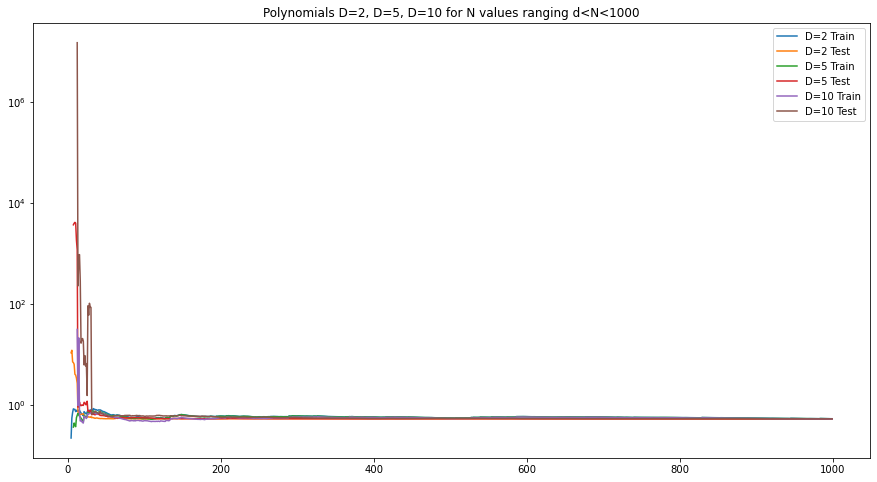

In [14]:
#Generate noisy data for polynomial of degree 5, with N = 1000 for train and test
d = 2
a = get_a(d)
x_train, y_train = draw_sample_with_noise(d,a,1000)
x_test, y_test = draw_sample_with_noise(d,a,1000)

#Generate a helper variable
n = list(range(1,1000))

#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat5 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat10 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)


#Plot 
plt.figure(figsize=(15,8))
plt.plot(n[3:], train_error_arr_2)
plt.plot(n[3:], test_error_arr_2)
plt.plot(n[6:], train_error_arr_5)
plt.plot(n[6:], test_error_arr_5)
plt.plot(n[11:], train_error_arr_10)
plt.plot(n[11:], test_error_arr_10)
plt.legend(labels=['D=2 Train','D=2 Test','D=5 Train', 'D=5 Test', 'D=10 Train','D=10 Test'])
plt.title("Polynomials D=2, D=5, D=10 for N values ranging d<N<1000")
plt.yscale('log')

Text(0.5, 1.0, 'Plot 2.1: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=200')

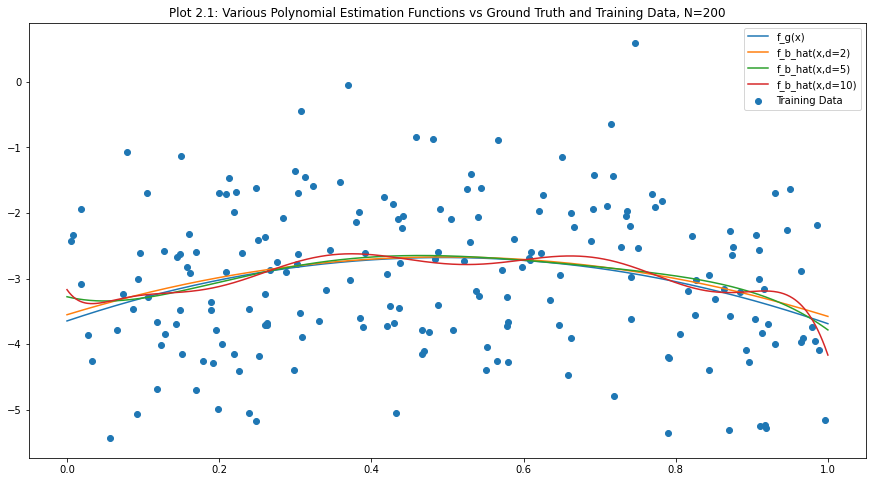

In [15]:
#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2_200 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat_5_200 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat_10_200 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)

#Plot b_hat predictions vs A
x = np.linspace(0,1,1000)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_2_200 @ helper_func(x,2)
func_b_hat_5 = b_hat_5_200 @ helper_func(x,5)
func_b_hat_10 = b_hat_10_200 @ helper_func(x,10)

#B_hat predictions given
plt.figure(figsize=(15,8))
plt.scatter(x_train[:201],y_train[:201])
plt.plot(x, func_g)
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_5)
plt.plot(x, func_b_hat_10)

plt.legend(labels=['f_g(x)','f_b_hat(x,d=2)','f_b_hat(x,d=5)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 2.1: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=200")

Text(0.5, 1.0, 'Plot 2.2: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=600')

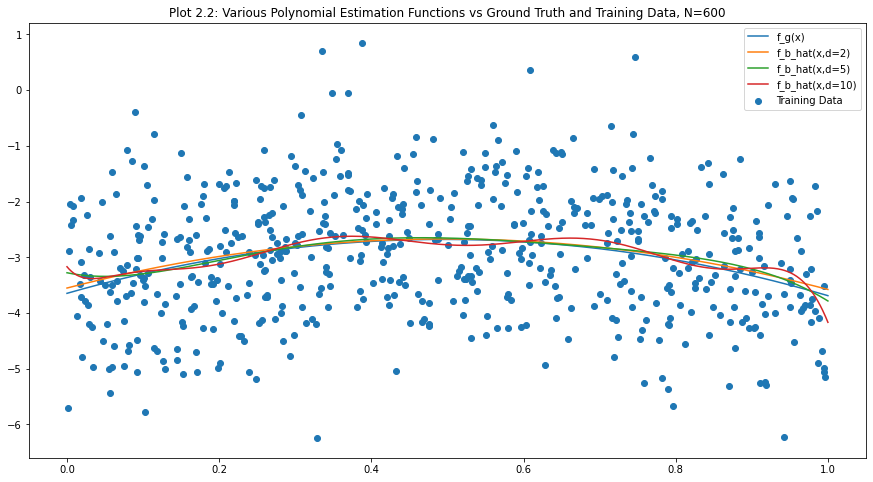

In [16]:
#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2_600 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat_5_600 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat_10_600 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_2_600 @ helper_func(x,2)
func_b_hat_5 = b_hat_5_600 @ helper_func(x,5)
func_b_hat_10 = b_hat_10_600 @ helper_func(x,10)

#B_hat predictions given
plt.figure(figsize=(15,8))
plt.scatter(x_train[:601],y_train[:601])
plt.plot(x, func_g)
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_5)
plt.plot(x, func_b_hat_10)

plt.legend(labels=['f_g(x)','f_b_hat(x,d=2)','f_b_hat(x,d=5)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 2.2: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=600")

Text(0.5, 1.0, 'Plot 2.3: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=1000')

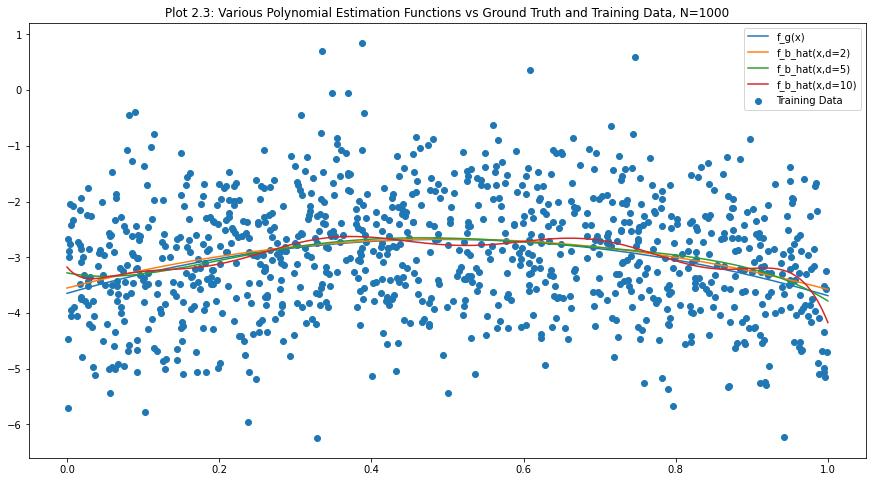

In [17]:
#Generate a helper variable
n = list(range(1,1001))

#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2_1000 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat_5_1000 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat_10_1000 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_2_1000 @ helper_func(x,2)
func_b_hat_5 = b_hat_5_1000 @ helper_func(x,5)
func_b_hat_10 = b_hat_10_1000 @ helper_func(x,10)

#B_hat predictions given N data points
plt.figure(figsize=(15,8))
plt.scatter(x_train[:1001],y_train[:1001])
plt.plot(x, func_g)
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_5)
plt.plot(x, func_b_hat_10)

plt.legend(labels=['f_g(x)','f_b_hat(x,d=2)','f_b_hat(x,d=5)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 2.3: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=1000")

### Question 12

**Approximation Error** = $R(f_F) - R(f^*)$
**Estimation Error** = $R(\hat{f}) - R(f_F)$ $\newline$ 
Excess Risk, and thus estimation error, approaches $0$ as $N$ becomes large. Specifically, estimation error decreases to 0 due to the law of large numbers, optimization error is already 0 as we are using the closed form solution of Least Squares Estimation rather than gradient descent, and approximation error also converges to 0 as our polynomials fit better and better to the ground truth polynomial, while simoltanuesly not being able to fit the random noise with variance 1.

Therefore, the only error that remains is Bayes risk. Since our Bayes predictor, $f^*$, is a polynomial function of degree $2$ with some noise added, is outside our hypothesis space. Bayes risk is equal to $\frac{1}{2}$, which makes perfect sense as our noise term is a random variable that is $0$ mean and has variance $1$ and our loss function is defined as the sum of squared errors divided by $2$.

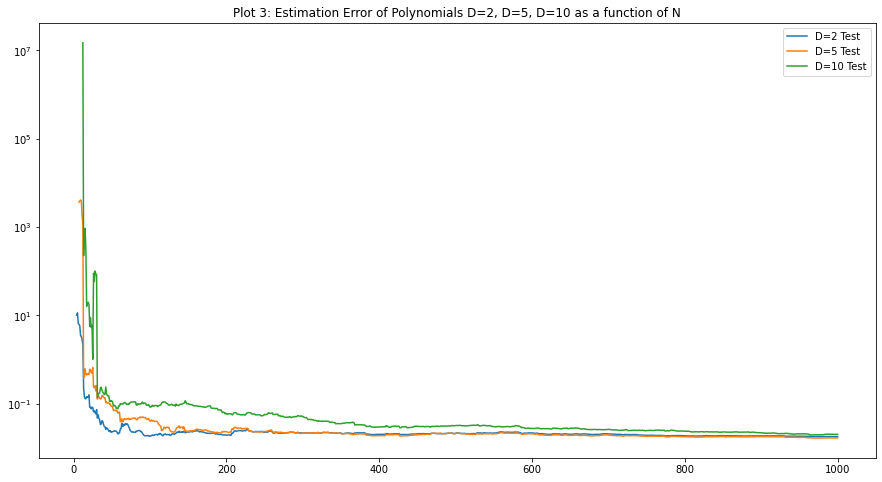

In [18]:
test_error_arr_2 = np.array(test_error_arr_2)
test_error_arr_5 = np.array(test_error_arr_5)
test_error_arr_10 = np.array(test_error_arr_10)

#Plot 
plt.figure(figsize=(15,8))
plt.plot(n[3:], test_error_arr_2-.5)
plt.plot(n[6:], test_error_arr_5-.5)
plt.plot(n[11:], test_error_arr_10-.5)
plt.legend(labels=['D=2 Test','D=5 Test', 'D=10 Test'])
plt.title("Plot 3: Estimation Error of Polynomials D=2, D=5, D=10 as a function of N")
plt.yscale('log')

### Question 13

*What is the effect of increasing N?*

As the higher dimension polynomials ($d >2$) are fit with larger $N$ observations of training data, the weights on the larger coefficients ($a_i$ where $i \in \{3,4,5,\dots, d\}$ approach $0$, while the weights of the first three coefficients ($a_0, a_1, a_2$) approach the ground truth function weights parameterized by $a$. The loss approaches 1, which is the same loss we would expect from our Bayes predictor, as our ground truth function contains noise with unit variance, and our loss is measure my MSE. When we calculate estimation error, it quickly approaches 0 for all of the polynomials as we get closer to 100 observations.

*What are the effects of increasing d?*

As we increase d, generalization error increases substantially. This is because the higher degree polynomials are liable to overfit our random sample data with overcomplicated polynomial curves, as well as modeling the noise and not capturing the true shape of the graph. As mentioned above, the generalization error converges to 0 as $N$ becomes sufficiently large. 

### Question 14

*Optimization Error*

There has been no optimization error in the algorithim we are implementing, as we are using the closed form linear algebra solution for least squares on a fairly small data set. If we had a large matrix, say 300m rows by 300m columns, then we would not be able to employ our current method as it would be too computationally expensive. We'd have to resort to methods like gradient descent, and then we would most likely have approximation error. That being said, in the methods employed on this homework, we have no optimization erorr.

### Question 15

In [19]:
data = np.loadtxt('ozone_wind.data')
print(max(data[:,0]))

168.74


In [20]:
#Make 70/30 Train Test Splits
x_train, y_train = data[:,1][:61], data[:,0][:61]
x_test, y_test = data[:,1][61:], data[:,0][61:]

In [21]:
#Iterate through values 1-> 10, which will be 
#the degree of our polynomial used to predict y
for i in range(1,15):
    
    #Get new design matrices for polynomial i
    X_train = get_design_mat(x_train, i)
    X_test = get_design_mat(x_test, i)
    
    #Calculate best coefficient for each term
    new_b_hat = least_squares_estimator(X_train, y_train)
    
    #Calculate empirical risk for polynomial degree i
    #Use the test set that we generated
    current_risk = empirical_risk(X_test,y_test,new_b_hat)
    print("Empirical Risk for Polynomial Degree", i, "is:",current_risk)    

Empirical Risk for Polynomial Degree 1 is: 384.7048169669439
Empirical Risk for Polynomial Degree 2 is: 300.2385522885913
Empirical Risk for Polynomial Degree 3 is: 342.7922052960828
Empirical Risk for Polynomial Degree 4 is: 418.22226037488457
Empirical Risk for Polynomial Degree 5 is: 434.10441766132203
Empirical Risk for Polynomial Degree 6 is: 844.1754597489719
Empirical Risk for Polynomial Degree 7 is: 1451.9818719739806
Empirical Risk for Polynomial Degree 8 is: 1351.525170933294
Empirical Risk for Polynomial Degree 9 is: 29187.968041553024
Empirical Risk for Polynomial Degree 10 is: 57896.52413379224
Empirical Risk for Polynomial Degree 11 is: 1230282.2230483317
Empirical Risk for Polynomial Degree 12 is: 263877.9141563437
Empirical Risk for Polynomial Degree 13 is: 24855.36055544052
Empirical Risk for Polynomial Degree 14 is: 325618.839584572


### It appears that a polynomial of degree 2 fits the data the best

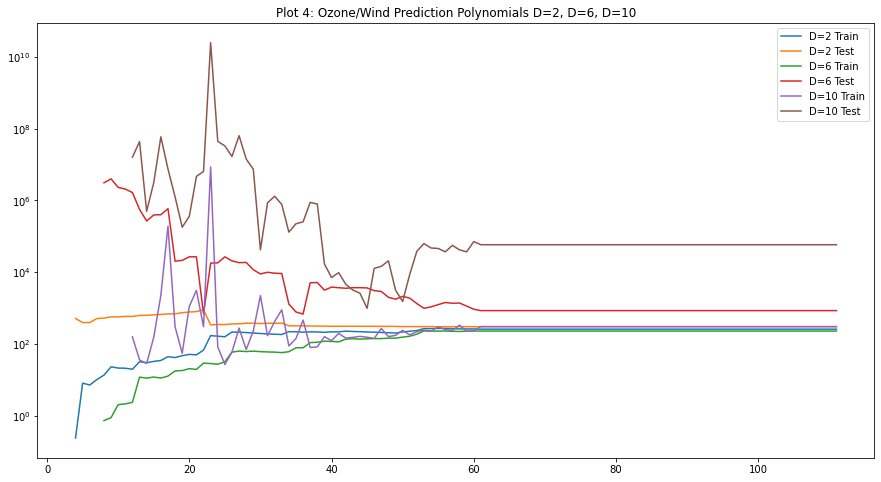

In [22]:
#Generate a helper variable
n = list(range(1,112))

#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 6
train_error_arr_6, test_error_arr_6, b_hat6 = poly_risk_gen(6,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat10 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)


#Plot 
plt.figure(figsize=(15,8))
plt.plot(n[3:], train_error_arr_2)
plt.plot(n[3:], test_error_arr_2)
plt.plot(n[7:], train_error_arr_6)
plt.plot(n[7:], test_error_arr_6)
plt.plot(n[11:], train_error_arr_10)
plt.plot(n[11:], test_error_arr_10)
plt.legend(labels=['D=2 Train','D=2 Test','D=6 Train', 'D=6 Test', 'D=10 Train','D=10 Test'])
plt.title("Plot 4: Ozone/Wind Prediction Polynomials D=2, D=6, D=10")
plt.yscale('log')

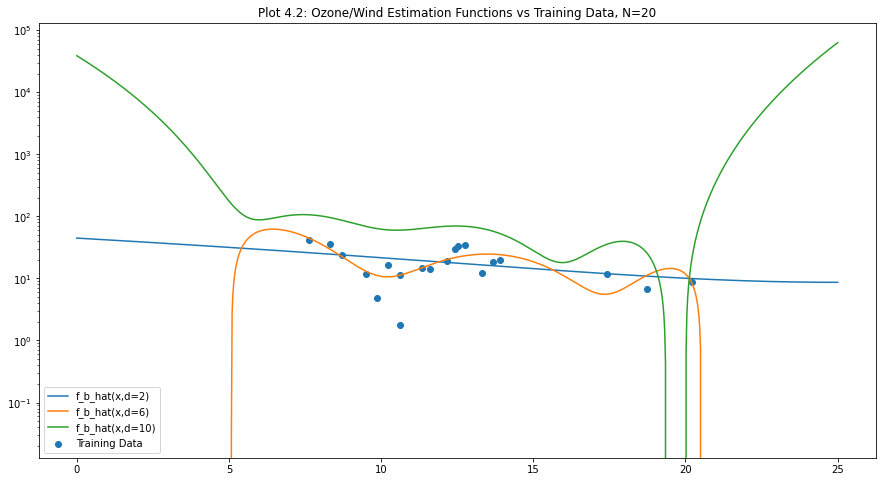

In [23]:
#Demonstrate how the polynomials generate different generalization error for different N
n = list(range(20))
polynomials = [2,6,10]

#Generate helper storage variables
train_error_dict = {2:[],
                  6:[],
                  10:[]}
test_error_dict = {2:[],
                  6:[],
                  10:[]}
b_hat_dict = {2:[],
                  6:[],
                  10:[]}

#Iterate over the polynomials
for d in polynomials:
    
    #Get training subsets of N samples
    x_train_subset = x_train[:20]
    y_train_subset = y_train[:20]
    
    #Calculate and store train /test error
    train_error, test_error, b_hat = poly_risk_gen(d, n, x_train_subset, y_train_subset, x_test,y_test)
    b_hat_dict[d].append(b_hat)
    train_error_dict[d].append(train_error)
    test_error_dict[d].append(test_error)
    
#Plot b_hat predictions vs A
x = np.linspace(0,25,1000)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_dict[2][0] @ helper_func(x,2)
func_b_hat_6 = b_hat_dict[6][0] @ helper_func(x,6)
func_b_hat_10 = b_hat_dict[10][0] @ helper_func(x,10)

#B_hat predictions given
plt.figure(figsize=(15,8))
plt.scatter(x_train[:20],y_train[:20])
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_6)
plt.plot(x, func_b_hat_10)
plt.legend(labels=['f_b_hat(x,d=2)','f_b_hat(x,d=6)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 4.2: Ozone/Wind Estimation Functions vs Training Data, N=20")
plt.yscale('log')

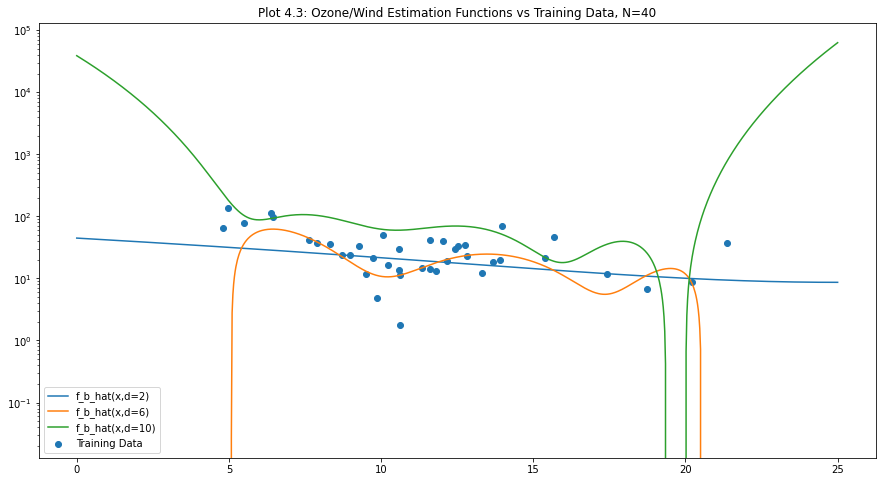

In [24]:
#Demonstrate how the polynomials generate different generalization error for different N
n = list(range(40))
polynomials = [2,6,10]

#Generate helper storage variables
train_error_dict = {2:[],
                  6:[],
                  10:[]}
test_error_dict = {2:[],
                  6:[],
                  10:[]}
b_hat_dict = {2:[],
                  6:[],
                  10:[]}

#Iterate over the polynomials
for d in polynomials:
    
    #Get training subsets of N samples
    x_train_subset = x_train[:20]
    y_train_subset = y_train[:20]
    
    #Calculate and store train /test error
    train_error, test_error, b_hat = poly_risk_gen(d, n, x_train_subset, y_train_subset, x_test,y_test)
    b_hat_dict[d].append(b_hat)
    train_error_dict[d].append(train_error)
    test_error_dict[d].append(test_error)
    
#Plot b_hat predictions vs A
x = np.linspace(0,25,1000)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_dict[2][0] @ helper_func(x,2)
func_b_hat_6 = b_hat_dict[6][0] @ helper_func(x,6)
func_b_hat_10 = b_hat_dict[10][0] @ helper_func(x,10)

#B_hat predictions given
plt.figure(figsize=(15,8))
plt.scatter(x_train[:40],y_train[:40])
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_6)
plt.plot(x, func_b_hat_10)
plt.legend(labels=['f_b_hat(x,d=2)','f_b_hat(x,d=6)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 4.3: Ozone/Wind Estimation Functions vs Training Data, N=40")
plt.yscale('log')

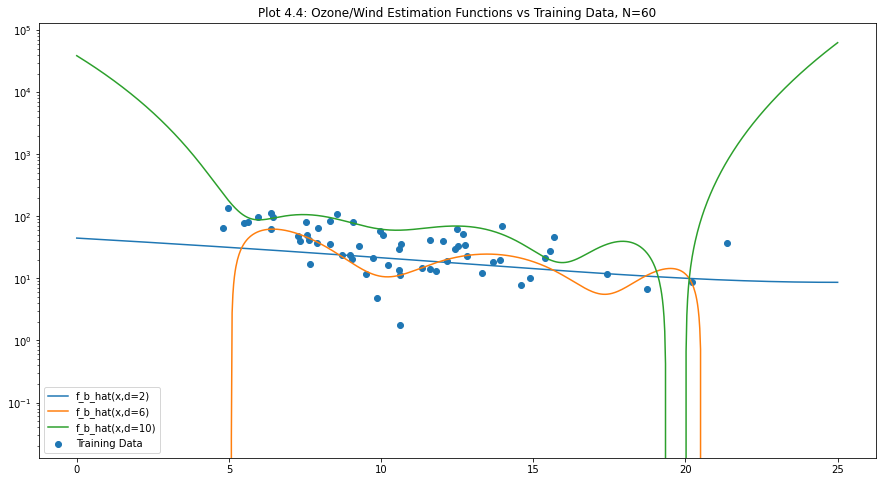

In [25]:
#Demonstrate how the polynomials generate different generalization error for different N
n = list(range(60))
polynomials = [2,6,10]

#Generate helper storage variables
train_error_dict = {2:[],
                  6:[],
                  10:[]}
test_error_dict = {2:[],
                  6:[],
                  10:[]}
b_hat_dict = {2:[],
                  6:[],
                  10:[]}

#Iterate over the polynomials
for d in polynomials:
    
    #Get training subsets of N samples
    x_train_subset = x_train[:20]
    y_train_subset = y_train[:20]
    
    #Calculate and store train /test error
    train_error, test_error, b_hat = poly_risk_gen(d, n, x_train_subset, y_train_subset, x_test,y_test)
    b_hat_dict[d].append(b_hat)
    train_error_dict[d].append(train_error)
    test_error_dict[d].append(test_error)
    
#Plot b_hat predictions vs A
x = np.linspace(0,25,1000)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_dict[2][0] @ helper_func(x,2)
func_b_hat_6 = b_hat_dict[6][0] @ helper_func(x,6)
func_b_hat_10 = b_hat_dict[10][0] @ helper_func(x,10)

#B_hat predictions given
plt.figure(figsize=(15,8))
plt.scatter(x_train[:60],y_train[:60])
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_6)
plt.plot(x, func_b_hat_10)
plt.legend(labels=['f_b_hat(x,d=2)','f_b_hat(x,d=6)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 4.4: Ozone/Wind Estimation Functions vs Training Data, N=60")
plt.yscale('log')

This time around, the generalization error of each polynomial does not converge to a certain value, which is very interesting. A polynomial of degree $2$ performed the best for both empirical and generalization risk, across varying amounts of training observation data used to fit our model $N \in \{20,40,60\}$. As we don't know the Bayes function, it is impossible to comment on the extent that approximation risk is present in our current total Risk, as the ozone and wind may or not may be explained by a polynomial relationship. Estimation risk is present in our model as the generalization error does not converge. If we had more data points, we could eliminate estimation risk as $N$ would increase the generalization error of our various polynomial functions would converge to the same value. Optimization risk should not be present in our excess risk decomposition, as we are still using the closed form linear algebra solution for ordinary least squares. If our $N$ observations grew untractably large, perhaps we'd have to resort to gradient descent methods, in which case, optimization error would be present.

In [26]:
print("Hi ting :)")

Hi ting :)
